Для таблицы young-people сделать следующее:

1. сделать нормализацию данных
2. запустить модель Лассо (см. тему "Линейная регрессия"), предсказывая "Пол человека"
3. Выдать список неинформативных признаков (тех, у кого вес в модели "Лассо" оказался равным 0)
4. ДЛя запуска модели Лассо нужно указывать значение константы. Выберете для п.2 (см. выше) любое ненулевое начение.

5. Методом перебора (в цикле) найдите такое значение константы для Лассо, что занулится не менее половины признаков.

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets

In [79]:
df = pd.read_csv('young-people-survey.csv', sep=',')
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [80]:
df.shape

(1010, 150)

In [81]:
for feature in list(df.select_dtypes(include=['object'])):
        labels, levels = pd.factorize(df[feature])
        df[feature] = labels
df = df.dropna()
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0,0,1,0,1,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0,0,1,0,0,1
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,1,0,1,0,1,0


In [82]:
df.shape

(686, 150)

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
np_scaled = scaler.fit_transform(df)
df_norm = pd.DataFrame(columns=df.columns, data=np_scaled)

df_norm.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,0.400588,-0.371701,-0.903237,-1.129275,-0.105240,-0.789688,-1.377429,1.334567,1.053651,-0.972459,...,-0.135772,-1.102755,-1.305293,-0.306222,-0.805771,-0.296799,-1.257781,-0.542587,-1.592554,-0.774140
1,-1.264887,0.890609,-0.903237,-1.129275,-1.042835,-1.594630,-0.594566,-0.376672,1.053651,1.179498,...,-0.499598,-1.102755,-0.585262,0.689361,-0.805771,-0.296799,-1.257781,-0.542587,0.618969,-0.774140
2,0.400588,2.152919,-0.903237,-0.231613,0.832355,0.820196,1.754026,-0.376672,1.053651,0.462179,...,-0.135772,0.265981,0.062767,0.689361,-0.805771,-0.296799,-0.069299,-0.542587,0.618969,-0.774140
3,0.400588,-0.371701,0.785102,0.666050,-0.105240,0.820196,0.188298,1.334567,-0.683860,-0.972459,...,-0.135772,-0.365743,-0.513259,-0.306222,-0.805771,-0.296799,-0.069299,-0.542587,-1.592554,1.260573
4,0.400588,-0.371701,-0.903237,0.666050,-0.105240,0.015254,0.188298,-1.232292,1.053651,1.896817,...,-0.135772,1.318855,0.782798,-0.306222,1.211597,-0.296799,-0.069299,-0.542587,0.618969,-0.774140


In [84]:
X = df.drop(columns='Gender')
y = df['Gender']

In [87]:
from sklearn.linear_model import Lasso

alphas = np.arange(0.001, 0.01, 0.001)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_
    if np.count_nonzero(lasso.coef_) > lasso.coef_.size / 2:
        print("Alpha = " ,end=str(alpha))
        print(" ")
        #print(lasso.coef_)
    i += 1

Alpha = 0.001 
Alpha = 0.002 
Alpha = 0.003 
Alpha = 0.004 
Alpha = 0.005 
Alpha = 0.006 
Alpha = 0.007 


Text(0.5,1,'Lasso')

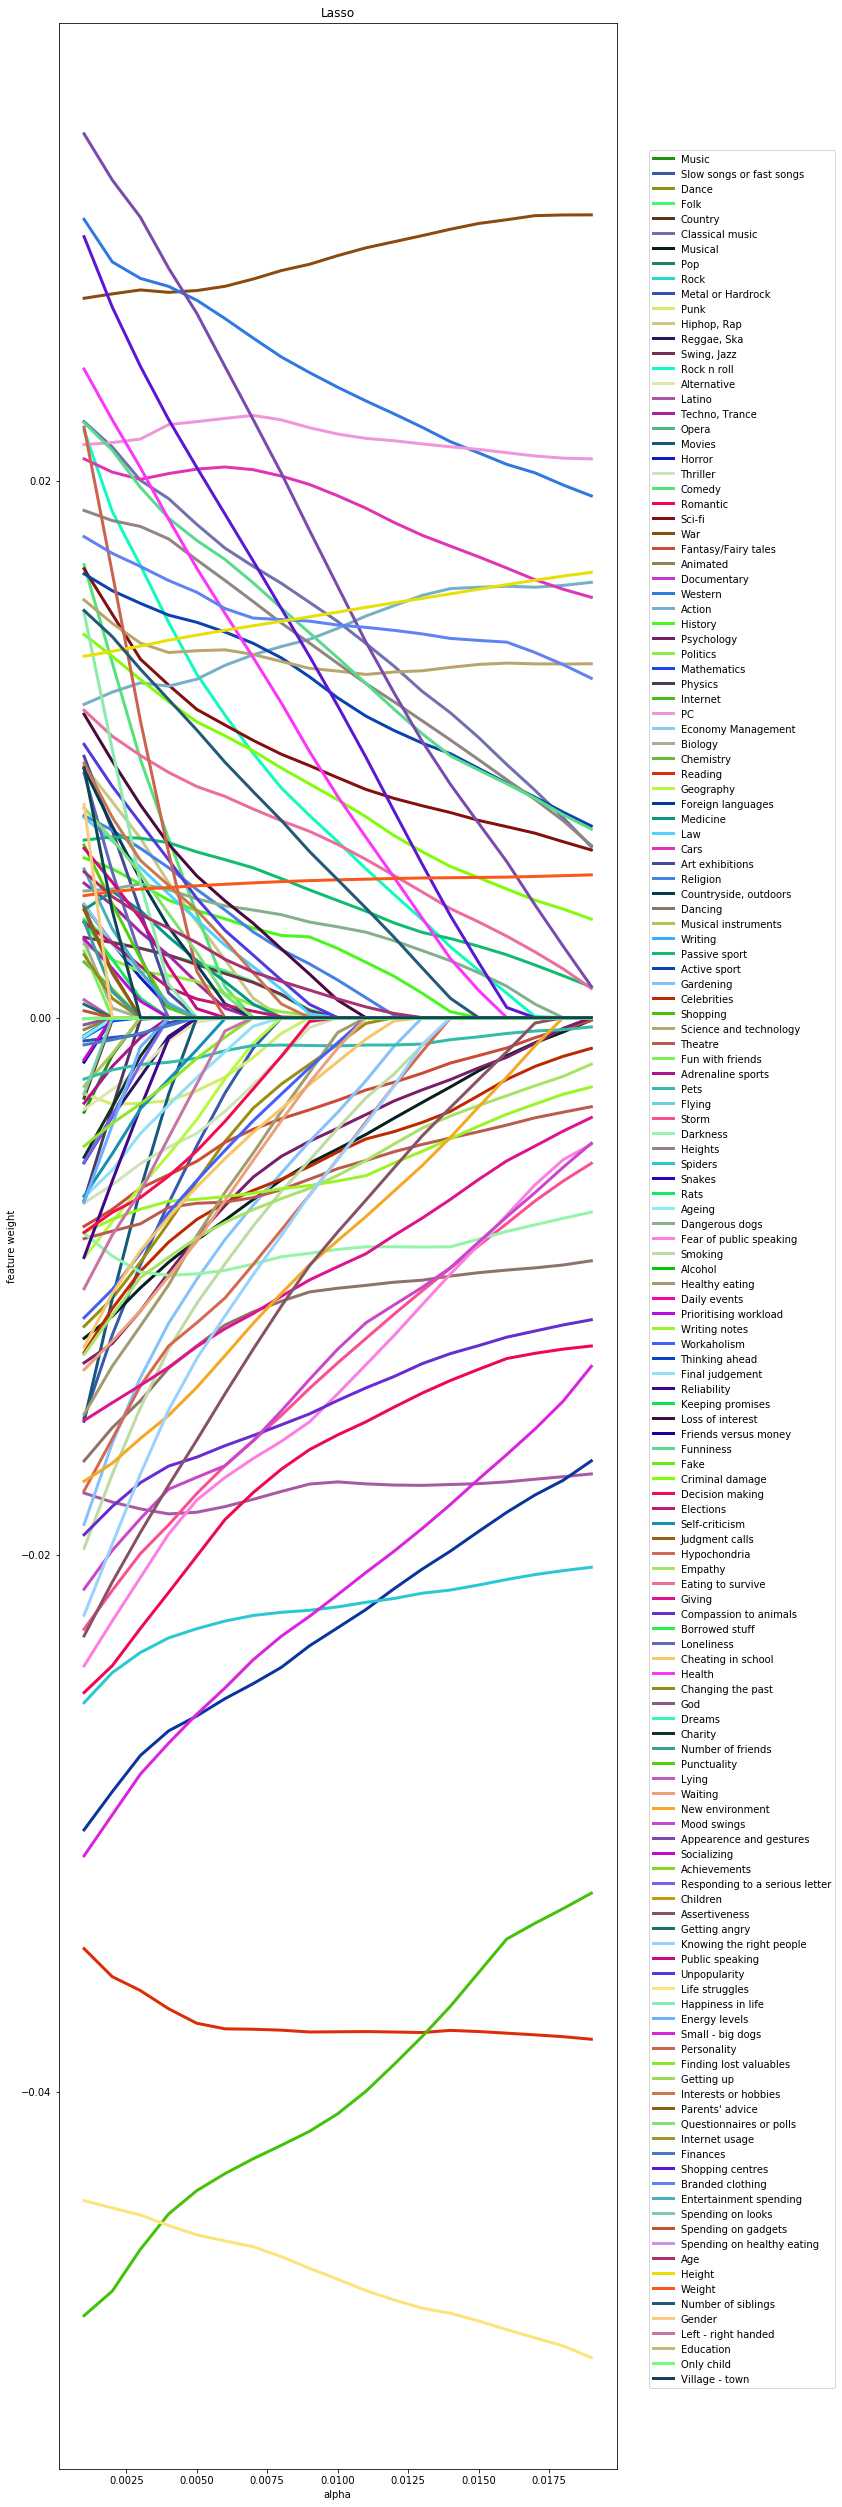

In [88]:
plt.figure(figsize=(10, 45))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")